In [2]:
import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

In [3]:
gas = ct.Solution('gri30.cti')
gas.TPX = 1250, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

In [4]:
# Initial temperatures
Temperature_range = list(range(800, 1700, 100))

# Specify the number of time steps and the time step size
nt = 100000
dt = 1.e-4  # s

# Storing auto ignitions
auto_ignitions = []

In [5]:
for index, Temperature in enumerate(Temperature_range):
    #################################################################
    # Initial temperature, Pressure and stoichiometry
    gas.TPX = Temperature, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
    # Create the batch reactor
    r = ct.IdealGasReactor(gas)
    # Now create a reactor network consisting of the single batch reactor
    sim = ct.ReactorNet([r])
    # Storage space
    mfrac = []
    # ...
    time = []
    temperature = []
    HR = []
    # Run the simulation
    # Initial simulation time
    current_time = 0.0
    # Loop for nt time steps of dt seconds.
    for n in range(nt):
        current_time += dt
        sim.advance(current_time)
        time.append(current_time)
        temperature.append(r.T)
        mfrac.append(r.thermo.Y)
        HR.append(- np.dot(gas.net_production_rates, gas.partial_molar_enthalpies))
    #################################################################
    # Catch the autoignition timing
    #################################################################
    # Get the ignition delay time by the maximum value of the Heat Release rate
    auto_ignition = time[HR.index(max(HR))]
    print('For T = ' + str(Temperature) + ', Autoignition time = ' + str(auto_ignition) + ' s')
    # Posterity
    FinalTemp = temperature[nt - 1]
    auto_ignitions.append(auto_ignition)
    # #################################################################
    # # Save results
    # #################################################################
    # # write output CSV file for importing into Excel
    # csv_file = '3-Output/Phi-1_P-1_T-' + str(Temperature) + '_UV.csv'
    # with open(csv_file, 'w') as outfile:
    # writer = csv.writer(outfile)
    # writer.writerow(['Auto ignition time [s]', 'Final Temperature [K]'] + gas.species_names)
    # writer.writerow([auto_ignition, FinalTemp] + list(mfrac[:]))
    # print('output written to ' + csv_file)
T_invert = [1000 / Temperature for Temperature in Temperature_range]

For T = 800, Autoignition time = 9.999999999990033 s
For T = 900, Autoignition time = 7.055299999996896 s
For T = 1000, Autoignition time = 1.066899999999899 s
For T = 1100, Autoignition time = 0.19789999999999452 s
For T = 1200, Autoignition time = 0.043400000000000216 s
For T = 1300, Autoignition time = 0.011099999999999988 s
For T = 1400, Autoignition time = 0.0032999999999999982 s
For T = 1500, Autoignition time = 0.0011000000000000003 s
For T = 1600, Autoignition time = 0.0004 s


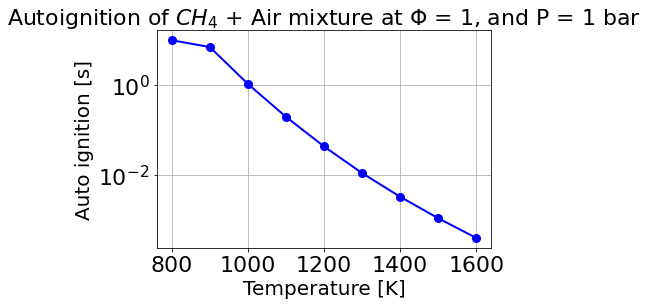

In [7]:
#################################################################
# Plot results
#################################################################
# create plot
plt.plot(Temperature_range, auto_ignitions, 'b-o')
plt.xlabel(r'Temperature [K]', fontsize=20)
plt.ylabel("Auto ignition [s]", fontsize=20)
plt.yscale('log')
plt.title(r'Autoignition of $CH_{4}$ + Air mixture at $\Phi$ = 1, and P = 1 bar',
fontsize=22, horizontalalignment='center')
#plt.axis(fontsize=20)
plt.grid()
plt.show()